In [5]:
# import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
# load the dataset
data = pd.read_csv("insurance.csv")

In [6]:
# preprocess the data: converting categorical variables into numerical
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data = pd.get_dummies(data, columns=['region'])

In [7]:
# split the dataset into features (X) and target variable (y)
X = data.drop(columns=['charges'])
y = data['charges']

In [8]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# choose algo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train R^2 score:", train_score)
print("Test R^2 score:", test_score)

Train R^2 score: 0.7417255854683333
Test R^2 score: 0.7835929767120723


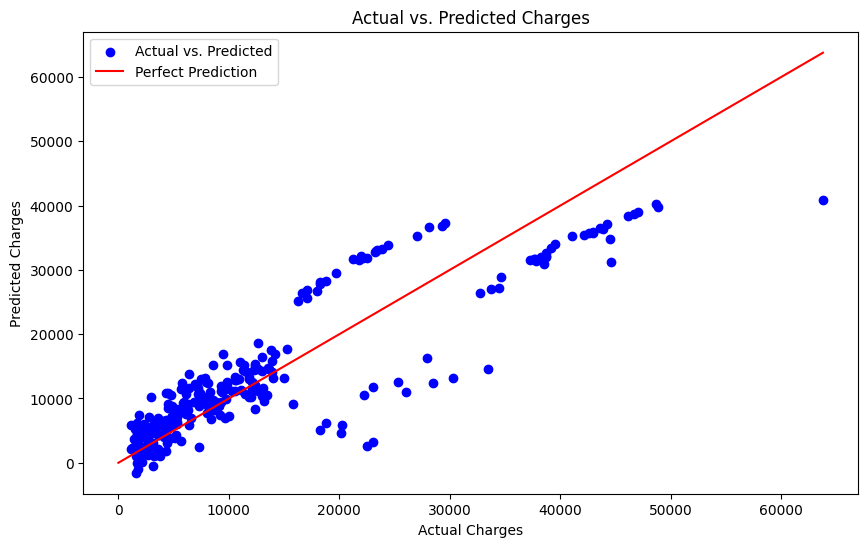

In [11]:
# vsualize the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), color='blue', label='Actual vs. Predicted')
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()